In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
import datetime
import seaborn as sns
%matplotlib inline


In [37]:
# Read the train user
train_users = pd.read_csv('../all/train_users_2.csv', parse_dates=[1, 2, 3])

### country_destination Analysis
Available country destinations are : US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. About 50% of the data is under NDF.

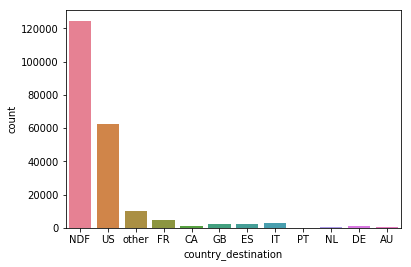

In [38]:
sns.countplot(x='country_destination',data=train_users,palette = 'husl')

### Age Analysis
If the age is invalid or missing they then they might not choose a destination

/home/neethu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/neethu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


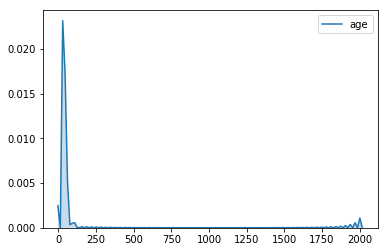

In [39]:
#Age

sns.kdeplot(train_users["age"],shade =True)

Text(0.5,0,'Age')

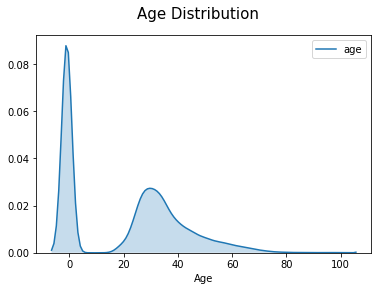

In [40]:
#Age after removing invalid data.

train_users['age'].fillna(-1, inplace=True)
train_users['age'] = np.where(train_users['age'] < 14, -1, train_users['age'])
train_users['age'] = np.where(train_users['age'] > 100, -1,train_users['age'])
train_users['Age_Missing'] = np.where((train_users['age'] == -1) , 'Missing', 'Age')

fig = sns.kdeplot(train_users["age"],shade =True)
fig.figure.suptitle("Age Distribution", fontsize = 15)
plt.xlabel('Age', fontsize=10)


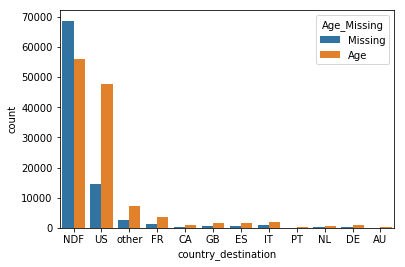

In [41]:
sns.countplot(x= train_users["country_destination"],hue =train_users["Age_Missing"] )

### date_account_created

Correlation between 'date_account_created' and 'timestamp_first_active' is 99%.So we can drop one of the 2 columns.

- Number of account creation has increased from 2010 to 2014
- Account creation increases from jan to Jun
- Account creation is less during weekend

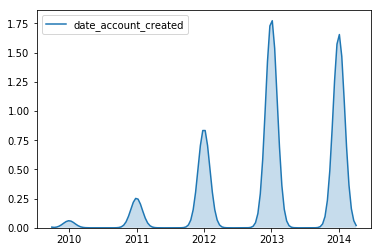

In [42]:
sns.kdeplot(train_users['date_account_created'].dt.year,shade =True)

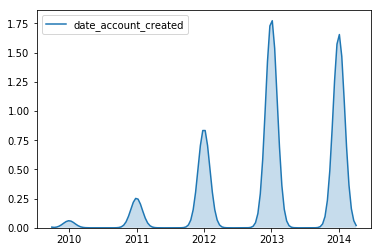

In [43]:
sns.kdeplot(train_users['date_account_created'].dt.year,shade =True)

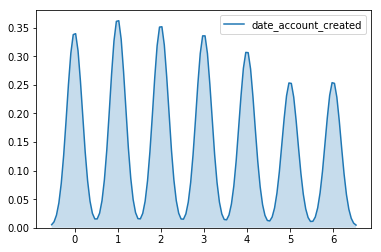

In [44]:
sns.kdeplot(train_users['date_account_created'].dt.dayofweek,shade =True)

### Gender Analysis
People who have not given gender or valid age are more likely to not book any destination

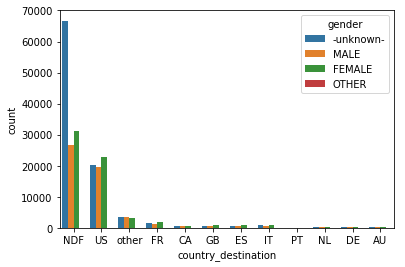

In [45]:
sns.countplot(x= train_users["country_destination"],hue =train_users["gender"] )

### Other Categorical Variables
- signup_method
- signup_flow
- language
- affiliate_channel
- affiliate_provider
- first_affiliate_tracked
- signup_app
- first_device_type
- first_browser
In all the above categories there is one category which is a greater impact on all the destinations. Like English is a laguage selected by majrity of the people


In [46]:
def draw_bar(train_users,col) :
    x = pd.DataFrame(columns=['country_destination', col, 'id'])
    for dc in train_users["country_destination"].unique():
        dcCount = train_users[train_users["country_destination"]==dc]['id'].count()
        y =  train_users[train_users["country_destination"]==dc].groupby(['country_destination',col])["id"].count().reset_index() 
        y['id'] = (y['id']*100)//dcCount
        x = x.append(y)
    sns.barplot(x= x["country_destination"],y= x["id"], hue =x[col] )

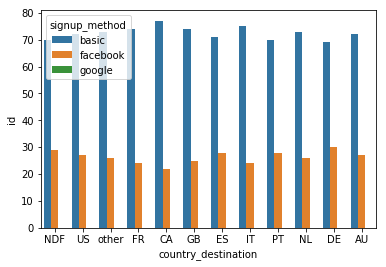

In [47]:
draw_bar(train_users,'signup_method')

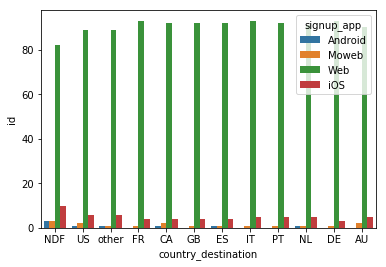

In [48]:
draw_bar(train_users,'signup_app')

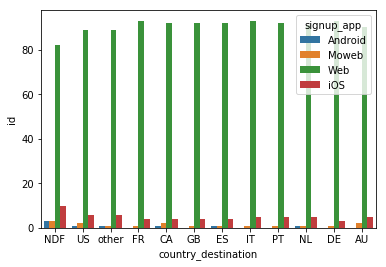

In [49]:
draw_bar(train_users,'signup_app')